<a href="https://colab.research.google.com/github/RobNewt/Data-Analysis/blob/master/Billboard_Top_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Billboard Top 100

This dataset, available via Data.world, contains every weekly Hot 100 singles chart between 8/2/1958 and 12/28/2019 from Billboard.com. Each row of data represents a song and the corresponding position on that week's chart. Included in each row are the following elements:
1. Billboard Chart URL
2. WeekID
3. Song name
4. Performer name
5. SongID - Concatenation of song & performer
6. Current week on chart
7. Instance (this is used to separate breaks on the chart for a given song. Example, an instance of 6 tells you that this is the sixth time this song has appeared on the chart)
8. Previous week position
9. Peak Position (as of the corresponding week)
10. Weeks on Chart (as of the corresponding week)

Also available is a dataset containing each song's "audio features."

These include common attributes like genre as well as the following:
1. Danceability
2. Energy
3. Key
4. Loudness
5. Mode
6. Speechiness
7. Acousticness
8. Instrumentalness
9. Liveness
10. Valence
11. Tempo
12. Time Signature

Definitions of those terms are available at https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Here's an example:

Liveliness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.



I'm excited about this data set. In addition to already numeric things like tempo, the ability to measure things like instrumentalness and speechiness give us some fun quantative measurements to play around with. I find change over time interesting, so I think I'm curious to see how things like average length of time on chart, average length of time on chart for #1 songs, and similar metrics change over time.

After exploring all that, I have a little bit of machine learning I'd like to do with this data set. First, I'd like to use the features available in the second dataframe to see what clusters exist within these weekly top 100 songs. Then I'm curious to see if I can use features from both dataframes to predict when a song originated.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime
register_matplotlib_converters()
import seaborn as sns


# 1: Explore the Charts
Let's just explore the data sets, do some cleaning/preprocessing, and get a sense of what's in there.

In [ ]:
df1= pd.read_csv("https://query.data.world/s/ywri3z52sryyglb3esstvexlw7hvl3")


In [ ]:
print(len(df1))
df1.head()

327895


url  ... Weeks on Chart
0  http://www.billboard.com/charts/hot-100/1965-0...  ...              4
1  http://www.billboard.com/charts/hot-100/1965-0...  ...              5
2  http://www.billboard.com/charts/hot-100/1965-0...  ...              6
3  http://www.billboard.com/charts/hot-100/1965-0...  ...              7
4  http://www.billboard.com/charts/hot-100/1965-0...  ...              8

[5 rows x 10 columns]

In [ ]:
df1['WeekID']=pd.to_datetime(df1['WeekID'], infer_datetime_format=True) #Let's convert WeekID to a date. Then it'll be easier to compare and sort with.

In [ ]:
df1.isnull().sum()

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    31954
Peak Position                 0
Weeks on Chart                0
dtype: int64

This is a really clean set. Those missing Previous Week Position values are all from songs appearing on the chart for the first time and shouldn't have a value there. I'm going to tidy this data by defining an observation to be the number of weeks a song was on the chart, it's peak position, and it's final Week ID

In [ ]:
df1['Song']

0           Don't Just Stand There
1           Don't Just Stand There
2           Don't Just Stand There
3           Don't Just Stand There
4           Don't Just Stand There
                    ...           
327890              God Is A Woman
327891     I Wanna Get Next To You
327892            I Can't Stand It
327893    Here I Am Come & Take Me
327894                       Hawai
Name: Song, Length: 327895, dtype: object

In [ ]:
df1[df1['Song'] == 'Jingle Bell Rock'][:8]

url  ... Weeks on Chart
8495    http://www.billboard.com/charts/hot-100/1958-1...  ...              1
19339   http://www.billboard.com/charts/hot-100/1961-1...  ...              1
105360  http://www.billboard.com/charts/hot-100/1958-1...  ...              2
105840  http://www.billboard.com/charts/hot-100/1961-1...  ...              2
142334  http://www.billboard.com/charts/hot-100/1961-1...  ...              4
167628  http://www.billboard.com/charts/hot-100/1961-1...  ...              3
168905  http://www.billboard.com/charts/hot-100/1959-0...  ...              3
181252  http://www.billboard.com/charts/hot-100/1962-0...  ...              6

[8 rows x 10 columns]

Hmm, a few occurences of Jingle Bell Rock. Let's see how many and when they appear.

In [ ]:
df1[(df1['Song']=='Jingle Bell Rock')].sort_values(by='Weeks on Chart', ascending = False)

url  ... Weeks on Chart
285686  https://www.billboard.com/charts/hot-100/2021-...  ...             36
285685  https://www.billboard.com/charts/hot-100/2021-...  ...             35
285684  https://www.billboard.com/charts/hot-100/2020-...  ...             34
285683  https://www.billboard.com/charts/hot-100/2020-...  ...             33
285682  https://www.billboard.com/charts/hot-100/2020-...  ...             32
285681  https://www.billboard.com/charts/hot-100/2020-...  ...             31
285680  https://www.billboard.com/charts/hot-100/2020-...  ...             30
285679  https://www.billboard.com/charts/hot-100/2019-...  ...             29
285678  https://www.billboard.com/charts/hot-100/2019-...  ...             28
285677  https://www.billboard.com/charts/hot-100/2019-...  ...             27
285676  https://www.billboard.com/charts/hot-100/2019-...  ...             26
285674  https://www.billboard.com/charts/hot-100/2019-...  ...             25
285673  https://www.billboard.com/charts/hot-100/2018-...  ...             24
285672  https://www.billboard.com/charts/hot-100/2018-...  ...             23
285671  https://www.billboard.com/charts/hot-100/2018-...  ...             22
285670  https://www.billboard.com/charts/hot-100/2018-...  ...             21
285652  http://www.billboard.com/charts/hot-100/2017-0...  ...             20
285650  http://www.billboard.com/charts/hot-100/2016-1...  ...             19
285646  http://www.billboard.com/charts/hot-100/2016-1...  ...             18
285609  http://www.billboard.com/charts/hot-100/2016-0...  ...             17
285553  http://www.billboard.com/charts/hot-100/1962-1...  ...             16
285546  http://www.billboard.com/charts/hot-100/1962-1...  ...             15
285543  http://www.billboard.com/charts/hot-100/1962-1...  ...             14
285538  http://www.billboard.com/charts/hot-100/1962-1...  ...             13
285074  http://www.billboard.com/charts/hot-100/1962-0...  ...             12
285035  http://www.billboard.com/charts/hot-100/1961-1...  ...             11
284989  http://www.billboard.com/charts/hot-100/1961-1...  ...             10
284943  http://www.billboard.com/charts/hot-100/1961-1...  ...              9
284897  http://www.billboard.com/charts/hot-100/1961-1...  ...              8
281000  http://www.billboard.com/charts/hot-100/1962-1...  ...              8
280445  http://www.billboard.com/charts/hot-100/1960-1...  ...              7
280706  http://www.billboard.com/charts/hot-100/1962-1...  ...              7
181252  http://www.billboard.com/charts/hot-100/1962-0...  ...              6
280119  http://www.billboard.com/charts/hot-100/1960-1...  ...              6
279828  http://www.billboard.com/charts/hot-100/1960-1...  ...              5
250703  http://www.billboard.com/charts/hot-100/1962-0...  ...              5
246829  http://www.billboard.com/charts/hot-100/1959-0...  ...              4
142334  http://www.billboard.com/charts/hot-100/1961-1...  ...              4
168905  http://www.billboard.com/charts/hot-100/1959-0...  ...              3
167628  http://www.billboard.com/charts/hot-100/1961-1...  ...              3
105360  http://www.billboard.com/charts/hot-100/1958-1...  ...              2
105840  http://www.billboard.com/charts/hot-100/1961-1...  ...              2
19339   http://www.billboard.com/charts/hot-100/1961-1...  ...              1
8495    http://www.billboard.com/charts/hot-100/1958-1...  ...              1

[44 rows x 10 columns]

So in addition to there being two different versions of Jingle Bell Rock, it looks like 'Weeks on Chart' allows for nonconsecutive weeks and 'Instance' tracks the nth time a song has entered the chart after having fallen off. Bobby Helms jumped from 1962 to 2016 and then showed up as recently as 2018. In a separate analysis, I might be interested in how Christmas music has changed over time. I could also use the point where Christmas music enters the chart to measure "Christmas Creep," the feeling that the Christmas season begins earlier each year.

In [ ]:
df1[(df1['Song']=='Jingle Bell Rock') & (df1['Performer'] =='Bobby Helms')].sort_values(by='Weeks on Chart', ascending = False)

url  ... Weeks on Chart
285686  https://www.billboard.com/charts/hot-100/2021-...  ...             36
285685  https://www.billboard.com/charts/hot-100/2021-...  ...             35
285684  https://www.billboard.com/charts/hot-100/2020-...  ...             34
285683  https://www.billboard.com/charts/hot-100/2020-...  ...             33
285682  https://www.billboard.com/charts/hot-100/2020-...  ...             32
285681  https://www.billboard.com/charts/hot-100/2020-...  ...             31
285680  https://www.billboard.com/charts/hot-100/2020-...  ...             30
285679  https://www.billboard.com/charts/hot-100/2019-...  ...             29
285678  https://www.billboard.com/charts/hot-100/2019-...  ...             28
285677  https://www.billboard.com/charts/hot-100/2019-...  ...             27
285676  https://www.billboard.com/charts/hot-100/2019-...  ...             26
285674  https://www.billboard.com/charts/hot-100/2019-...  ...             25
285673  https://www.billboard.com/charts/hot-100/2018-...  ...             24
285672  https://www.billboard.com/charts/hot-100/2018-...  ...             23
285671  https://www.billboard.com/charts/hot-100/2018-...  ...             22
285670  https://www.billboard.com/charts/hot-100/2018-...  ...             21
285652  http://www.billboard.com/charts/hot-100/2017-0...  ...             20
285650  http://www.billboard.com/charts/hot-100/2016-1...  ...             19
285646  http://www.billboard.com/charts/hot-100/2016-1...  ...             18
285609  http://www.billboard.com/charts/hot-100/2016-0...  ...             17
285553  http://www.billboard.com/charts/hot-100/1962-1...  ...             16
285546  http://www.billboard.com/charts/hot-100/1962-1...  ...             15
285543  http://www.billboard.com/charts/hot-100/1962-1...  ...             14
285538  http://www.billboard.com/charts/hot-100/1962-1...  ...             13
285074  http://www.billboard.com/charts/hot-100/1962-0...  ...             12
285035  http://www.billboard.com/charts/hot-100/1961-1...  ...             11
284989  http://www.billboard.com/charts/hot-100/1961-1...  ...             10
284943  http://www.billboard.com/charts/hot-100/1961-1...  ...              9
284897  http://www.billboard.com/charts/hot-100/1961-1...  ...              8
280445  http://www.billboard.com/charts/hot-100/1960-1...  ...              7
280119  http://www.billboard.com/charts/hot-100/1960-1...  ...              6
279828  http://www.billboard.com/charts/hot-100/1960-1...  ...              5
246829  http://www.billboard.com/charts/hot-100/1959-0...  ...              4
168905  http://www.billboard.com/charts/hot-100/1959-0...  ...              3
105360  http://www.billboard.com/charts/hot-100/1958-1...  ...              2
8495    http://www.billboard.com/charts/hot-100/1958-1...  ...              1

[36 rows x 10 columns]

I'm interested in seeing how the amount of time each song spends on the chart changes over time. So I'm going to make each chart it's own observation and then average the values in that chart. Now 'Weeks on Chart' will represent the average number of weeks each song on that chart has been on Billboard's top 100.

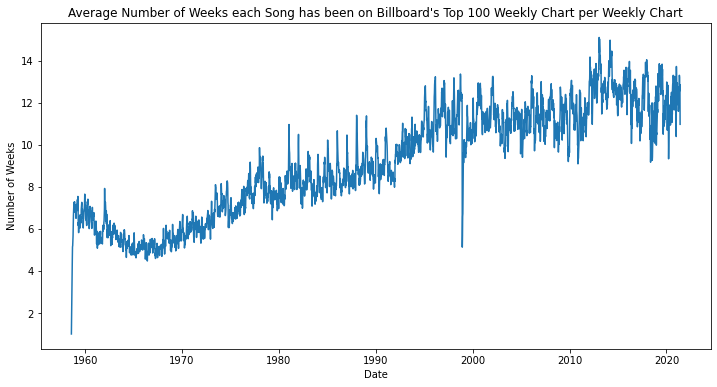

In [ ]:
average = df1.groupby('WeekID').mean().sort_values('WeekID', ascending=True)
#median = df1.groupby('WeekID').median().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks each Song has been on Billboard's Top 100 Weekly Chart per Weekly Chart")
plt.plot(average['Weeks on Chart']);

So there are a couple things we notice on this graph. First, there's that initial jump. The first few charts had no significant values for "Weeks on Chart". That is, all songs on the first chart had been on the charts 1 week. The second week was a mix of 1 and 2 weeks, etc.

Second, I'm quite surprised by the very clear upward trend. It seems like songs are spending longer on the chart but that there's also more volatility. That volatility may just be explained by the increase in number of weeks and that relatively, it's isn't any more volatile.

Last, that dip just before 2000 is unusual. It's so short though, maybe a few weeks. I'm going to ignore it for the time being.

Let's also long at staying power of top 10 songs vs bottom 50 songs.

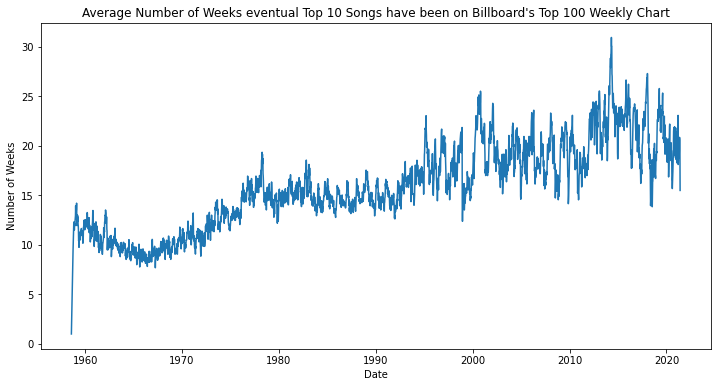

In [ ]:
top_10_mean = df1[df1['Peak Position'] <=10].groupby('WeekID').mean().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks eventual Top 10 Songs have been on Billboard's Top 100 Weekly Chart")
plt.plot(top_10_mean['Weeks on Chart']);

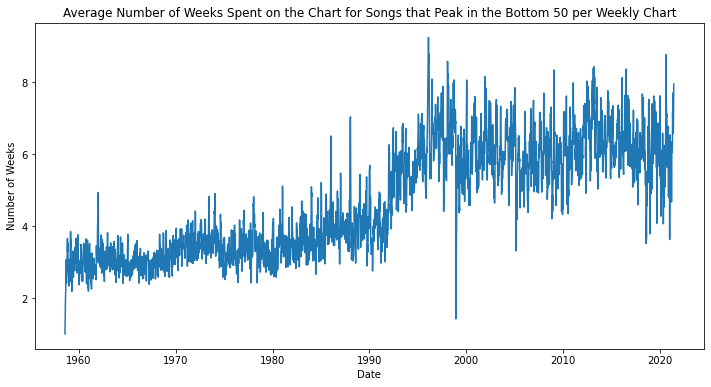

In [ ]:
bottom_50_mean = df1[df1['Peak Position'] >=50].groupby('WeekID').mean().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks Spent on the Chart for Songs that Peak in the Bottom 50 per Weekly Chart")
plt.plot(bottom_50_mean['Weeks on Chart']);

I think this is an interesting graph. From 1960 through 1992 or so, we see the staying power of eventual bottom 50 songs is pretty constant. From 1992ish until 1995 or so their time spent on the chart starts to rise. Then in 1995 or so it levels out again. A small poke around the internet (that is, Wikipedia) revelease a little bit of industry shakeup. 

SONY bought out in 1988 and rebranded in 1991 another major label. 
Warner Music Group dealt with a ton of internal drama through the 90s that settled by 96 or so. This looks like a really interesting time period to do more research on. Somewhere in there we may find some reasons for why those bottom 50 songs went from 2-3 weeks on the charts to 4-6 weeks on the charts.

# 2: Explore musicality

Let's load our dataframe that's converted things like acousticness and speachiness to a number as well as listen to a few examples and get a sense of those measurements.

In [ ]:
df2 = pd.read_excel("https://query.data.world/s/i3nlbm2tqich6icwnp25de3gtph2xw")
df2.head()
len(df2)

29503

In [ ]:
df2.isnull().sum()


SongID                           0
Performer                        0
Song                             0
spotify_genre                 1600
spotify_track_id              5106
spotify_track_preview_url    15012
spotify_track_duration_ms     5106
spotify_track_explicit        5106
spotify_track_album           5112
danceability                  5169
energy                        5169
key                           5169
loudness                      5169
mode                          5169
speechiness                   5169
acousticness                  5169
instrumentalness              5169
liveness                      5169
valence                       5169
tempo                         5169
time_signature                5169
spotify_track_popularity      5106
dtype: int64

Half the songs don't have a spotify url, nor is it that interesting of a feature, so I'll just drop that column, as well as some of the other spotify information.

There's a lot of missing information across danceability through time signature though. I'm going to assume that it's mostly the same 5100 songs missing all the data.

In [ ]:
df2 = df2.drop(columns= ['Performer', 'Song', 'spotify_track_preview_url','spotify_track_id', 'spotify_track_album'])


In [ ]:
df2.isnull().sum()

SongID                          0
spotify_genre                1600
spotify_track_duration_ms    5106
spotify_track_explicit       5106
danceability                 5169
energy                       5169
key                          5169
loudness                     5169
mode                         5169
speechiness                  5169
acousticness                 5169
instrumentalness             5169
liveness                     5169
valence                      5169
tempo                        5169
time_signature               5169
spotify_track_popularity     5106
dtype: int64

In [ ]:
df2=df2.dropna()
len(df2)

24186

So we're at 24186 entries, down from 29503. We've lost 5317 data points which doesn't seem bad given we were going to lose at least 5100 from missing entries in the features we were interested in and we're only out 200 more than that. Our assumption that missing data was consistent across entries seems to have been valid!

Let's explore some of these features we're interested in.

In [ ]:
#@title
df2[:50]

SongID  ... spotify_track_popularity
2              ......And Roses And RosesAndy Williams  ...                     38.0
3            ...And Then There Were DrumsSandy Nelson  ...                     11.0
4                 ...Baby One More TimeBritney Spears  ...                     77.0
5                        ...Ready For It?Taylor Swift  ...                     73.0
7                           '65 Love AffairPaul Davis  ...                     40.0
10          'til I Can Make It On My OwnTammy Wynette  ...                     31.0
12             'Til My Baby Comes HomeLuther Vandross  ...                     29.0
13                'Til Summer Comes AroundKeith Urban  ...                     42.0
14                        'Til You Do Me RightAfter 7  ...                     42.0
15                                     'TilThe Angels  ...                     10.0
16                   'Tis The Damn SeasonTaylor Swift  ...                     70.0
17                        "B" GirlsYoung And Restless  ...                     20.0
18  "Cherry Cherry" from Hot August NightNeil Diamond  ...                     16.0
23             ('til) I Kissed YouThe Everly Brothers  ...                     53.0
27         (All Of A Sudden) My Heart SingsMel Carter  ...                     17.0
28          (All of a Sudden) My Heart SingsPaul Anka  ...                     21.0
29      (Any Way That You Want It) I'll Be ThereStarz  ...                      2.0
31                     (Baby) Hully GullyThe Olympics  ...                      5.0
33              (Believed You Were) Lucky'Til Tuesday  ...                     17.0
34      (Between A) Rock And A Hard PlaceCutting Crew  ...                     19.0
35    (Bringing Out) The Girl In MeMaxine Nightingale  ...                      6.0
36             (Call Me Your) Anything ManBobby Moore  ...                      4.0
38  (Can't Live Without Your) Love And AffectionNe...  ...                     47.0
39         (Closest Thing To) PerfectJermaine Jackson  ...                      8.0
40  (Come 'round Here) I'm The One You NeedThe Mir...  ...                     26.0
42              (Dance The) Mess AroundChubby Checker  ...                     13.0
44                (Do The New) ContinentalThe Dovells  ...                     16.0
47                      (Do You) Wanna RideReel Tight  ...                      7.0
49            (Don't Fear) The ReaperBlue Oyster Cult  ...                     77.0
50  (Don't Worry) If There's A Hell Below We're Al...  ...                     15.0
53       (everybody Wanna Get Rich) Rite AwayDr. John  ...                     54.0
54       (Everything I Do) I Do It For YouBryan Adams  ...                     65.0
55  (For God's Sake) Give More Power To The People...  ...                     29.0
56  (Forever) Live And DieOrchestral Manoeuvres In...  ...                     48.0
57                   (Ghost) Riders In The SkyOutlaws  ...                     47.0
58                   (Ghost) Riders In The SkyRamrods  ...                     24.0
59     (Girls, Girls, Girls) Made To LoveEddie Hodges  ...                     16.0
61                  (He's My) DreamboatConnie Francis  ...                     28.0
62   (He's) Raining In My SunshineJay & The Americans  ...                     10.0
63            (He's) The Great ImpostorThe Fleetwoods  ...                     15.0
64  (Here They Come) From All Over The WorldJan & ...  ...                     15.0
65  (Hey Won't You Play) Another Somebody Done Som...  ...                     40.0
70                       (How To Be A) MillionaireABC  ...                     29.0
72  (I Can Feel Those Vibrations) This Love Is Rea...  ...                     26.0
73  (I Can Feel Your Love) Slipping AwayBarbara Mason  ...                     16.0
74    (I Can't Get No) SatisfactionThe Rolling Stones  ...                     78.0
75    (I Can't Help You) I'm Falling TooSkeeter Davis  ...                     23.0
76  (I Could On

Acousticness:	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Acoustic: (of popular music or musical instruments) not having electrical amplification.

So we should be looking at audio fairly devoid of any electrical effects or amplification.

In [ ]:
df2.sort_values('acousticness', ascending=False)[:10]

SongID  ... spotify_track_popularity
6881                            ExodusFerrante & Teicher  ...                     13.0
22790                               StimulationWa Wa Nee  ...                     13.0
22578                              StardustFrank Sinatra  ...                     31.0
13040          It's Just A House Without YouBrook Benton  ...                      4.0
872                 Afternoon DelightStarland Vocal Band  ...                     17.0
25207  Theme From "Close Encounters Of The Third Kind...  ...                      0.0
22904                Stranger On The ShoreMr. Acker Bilk  ...                      7.0
17843   Nothing But GoodHank Ballard And The Midnighters  ...                      1.0
11814                     I'll Remember TonightPat Boone  ...                      8.0
10819         I Dreamed Of A Hill-Billy HeavenTex Ritter  ...                      4.0

[10 rows x 17 columns]

Ferrante & Teicher, as 2 people playing pianos makes sense. I'm highly suspicious of Stimulation by Wa Wa Nee, a very synthetic pop song. Sinatra makes sense, as does most of the rest of these top 15. While Justin Bieber has put out a number of dance songs with electronic influence, Nothing Like Us is actually one of his quieter, more instrumental songs.

So it looks like #2 might be a peculiar outlier.

In [ ]:
df2.sort_values('acousticness', ascending=True)[:15]

SongID  ... spotify_track_popularity
22444                             SpeakGodsmack  ...                     45.0
4062              Check My BrainAlice In Chains  ...                     59.0
1448               An Honest MistakeThe Bravery  ...                     51.0
5339   Devil's AngelsDavie Allan And The Arrows  ...                     12.0
9606                           Here To StayKorn  ...                     60.0
6436                       Easy LivinUriah Heep  ...                     57.0
13556             Just Like YouThree Days Grace  ...                     61.0
3937                         Celebrity SkinHole  ...                     66.0
19671                Reach For The SkyFirehouse  ...                     44.0
1018                                AliveP.O.D.  ...                     64.0
22717                      Step OnHappy Mondays  ...                     59.0
25762              Times Like TheseFoo Fighters  ...                     67.0
26495  Under And Over ItFive Finger Death Punch  ...                     62.0
2917                                  BlowKe$ha  ...                      2.0
18690           Papa Don't PreachKelly Osbourne  ...                     36.0

[15 rows x 17 columns]

And this seems to be a pretty good sign. We see a lot of rock and metal, so we're talking electric guitars with distortion, and then a few pop songs at the end.

In [ ]:
df2.sort_values('speechiness', ascending=False)[:5]

SongID  ... spotify_track_popularity
986        Ajax AirlinesHudson and Landry  ...                      5.0
987    Ajax Liquor StoreHudson and Landry  ...                      8.0
26165            Trouble Me10,000 Maniacs  ...                      0.0
24267               The Climb BackJ. Cole  ...                      0.0
8806       Grandmother's SongSteve Martin  ...                     16.0

[5 rows x 17 columns]

The first song is a country song which is a little weird but the next few entries make more sense. Hudson and Landry are a comedy duo, Steve Martin is more comedy, those should be here. We'll also note those comedy bits are high on acousticness as well.

In [ ]:
corr_df = df2.corr()
corr_df

spotify_track_duration_ms  ...  spotify_track_popularity
spotify_track_duration_ms                   1.000000  ...                  0.180827
spotify_track_explicit                      0.037698  ...                  0.342729
danceability                                0.084187  ...                  0.183116
energy                                      0.123577  ...                  0.176296
key                                         0.009725  ...                  0.002263
loudness                                    0.032597  ...                  0.350345
mode                                       -0.120004  ...                 -0.119336
speechiness                                 0.029608  ...                  0.213233
acousticness                               -0.288098  ...                 -0.304212
instrumentalness                            0.020411  ...                 -0.118356
liveness                                   -0.032789  ...                 -0.073627
valence                                    -0.145900  ...                 -0.217784
tempo                                      -0.018607  ...                  0.026859
time_signature                              0.070417  ...                  0.112434
spotify_track_popularity                    0.180827  ...                  1.000000

[15 rows x 15 columns]

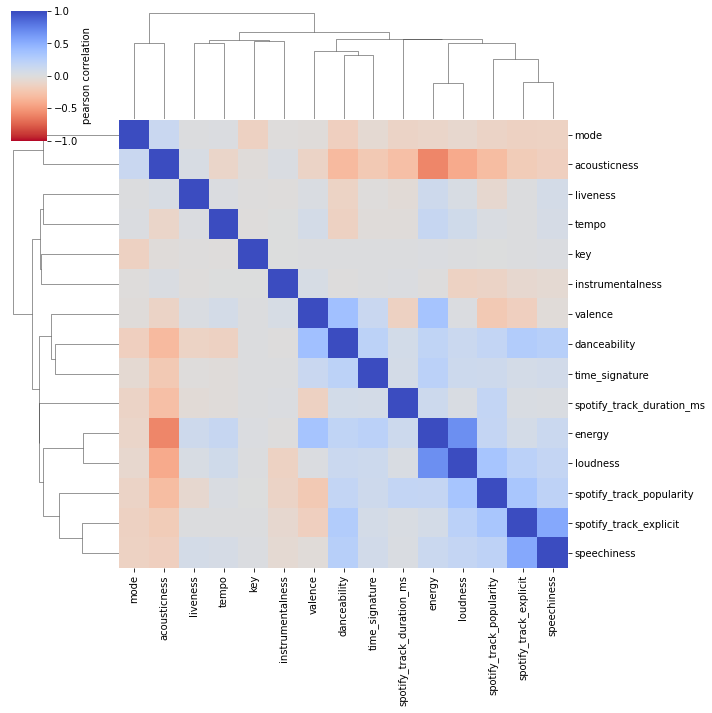

In [ ]:
sns.clustermap(
    corr_df,
    vmin=-1,
    vmax=1,
    cmap='coolwarm_r',
    cbar_kws={'label': 'pearson correlation'}
);

This heatmap is pretty interesting. We notice the following correlations among features:

4 and 6: strong positive, 0 and 8: slight positive, 4 and 9: strong negative

So let's see what those features are:

0 - explicit

8 - speechiness

9 - acousticness

4 - energy

6 - loudness

It might not be totally surprising that loudness and energy have strong positive correlation while energy and acousticness (as well as acousticness and loudness) have negative correlations. As per explicit and speechiness, I have a hunch and I might look at genres to see what's there.

Let's see how various features compare with each other.


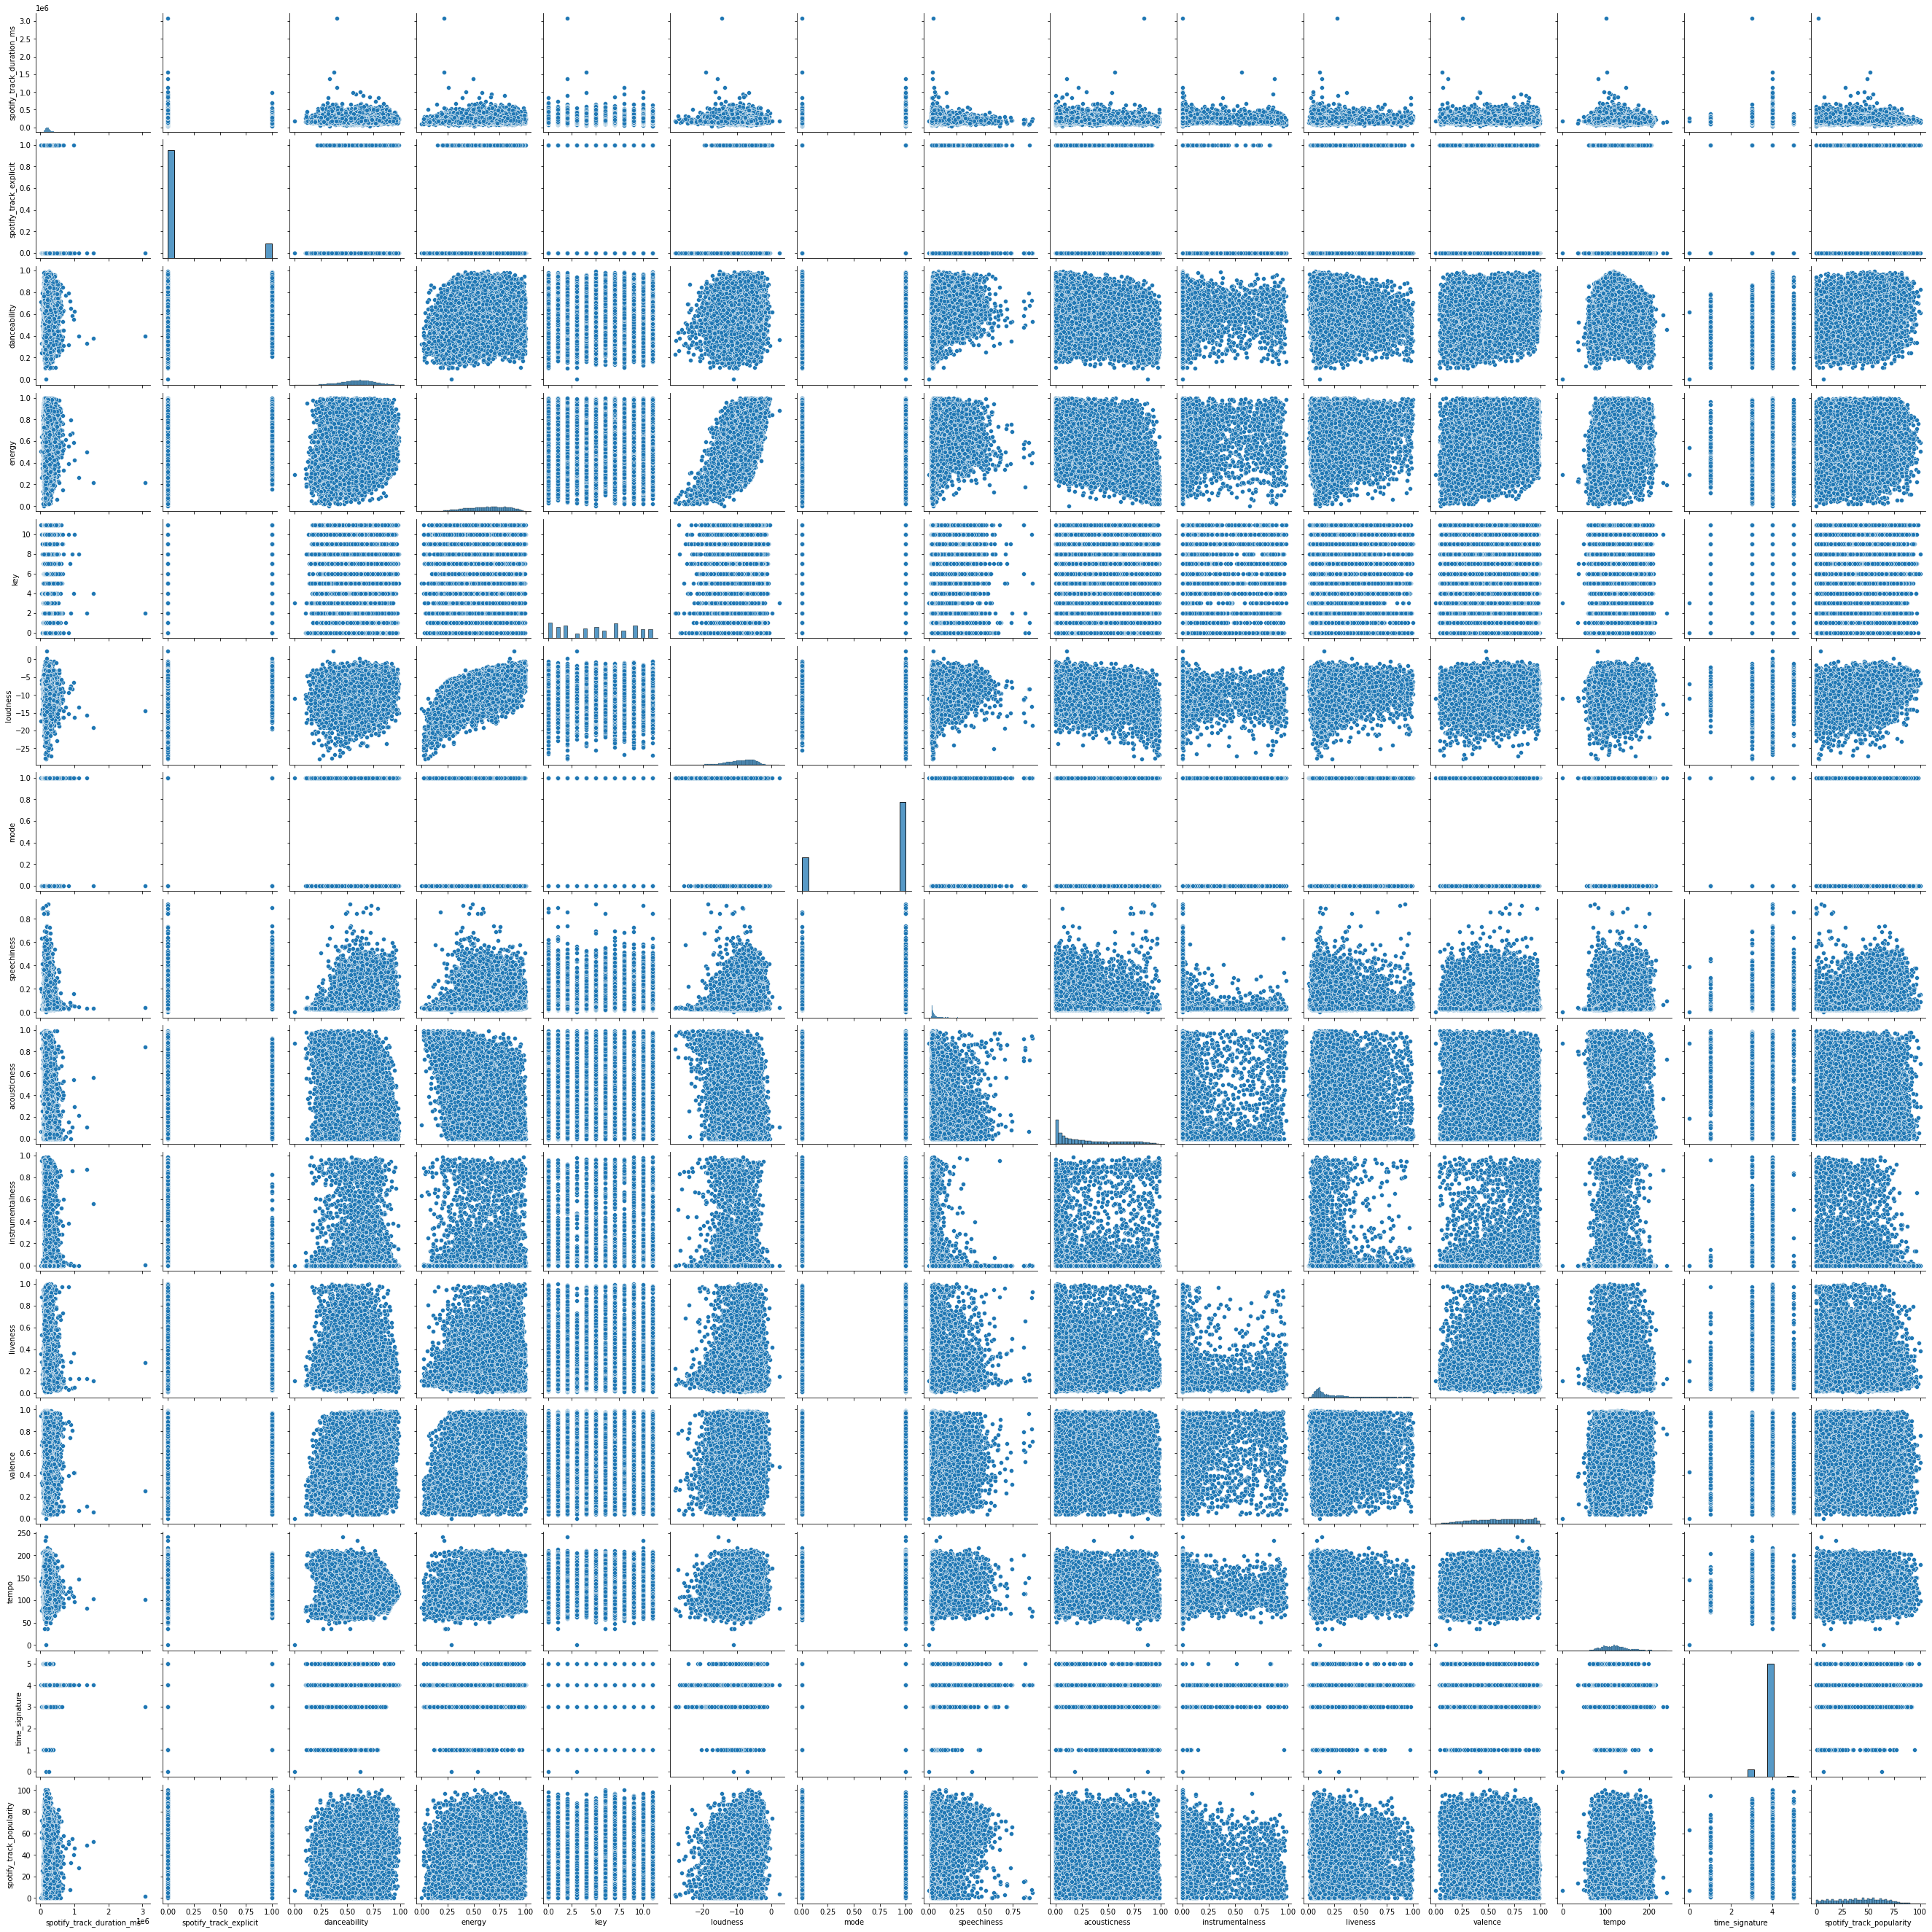

In [ ]:
sns.pairplot(df2)

Again, it's very easy to understand the relationship between loudness and energy. 

Some of the empty spaces in the scatter plots define some interesting relationships too. At all levels of instrumentalness we see a pretty even spread for low level of liveness, but we really only see high levels of liveness for low levels of instrumentalness. 

Now let's merge this onto our first dataframe and add these measures of musicality for our chart info.

In [ ]:
merged_left = df1.merge(right=df2)
merged_left['spotify_track_duration_ms']=merged_left['spotify_track_duration_ms']/1000
merged_left = merged_left.rename(columns={'spotify_track_duration_ms':'spotify_track_duration_seconds'})


In [ ]:
merged_left.head()

url  ... spotify_track_popularity
0  http://www.billboard.com/charts/hot-100/1965-0...  ...                     21.0
1  http://www.billboard.com/charts/hot-100/1965-0...  ...                     21.0
2  http://www.billboard.com/charts/hot-100/1965-0...  ...                     21.0
3  http://www.billboard.com/charts/hot-100/1965-0...  ...                     21.0
4  http://www.billboard.com/charts/hot-100/1965-0...  ...                     21.0

[5 rows x 26 columns]

Now that we've merged both dataframes, let's look at what happens to some of these sound measurements over time!

In [ ]:
mean = merged_left.groupby('WeekID').mean().sort_values('WeekID', ascending=True)

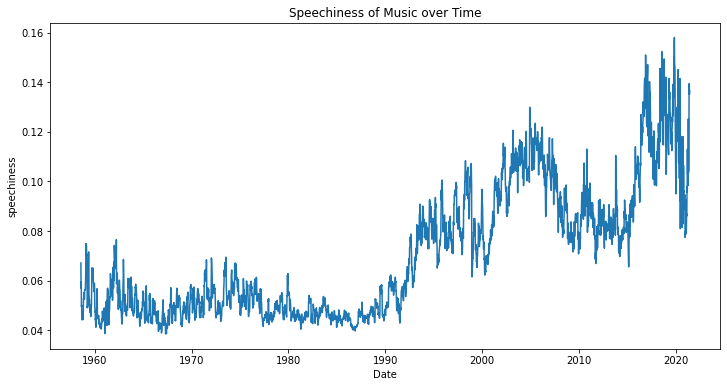

In [ ]:
plt.figure(figsize=(12,6))
plt.ylabel('speechiness')
plt.xlabel('Date')
plt.title("Speechiness of Music over Time")
plt.plot(mean['speechiness']);

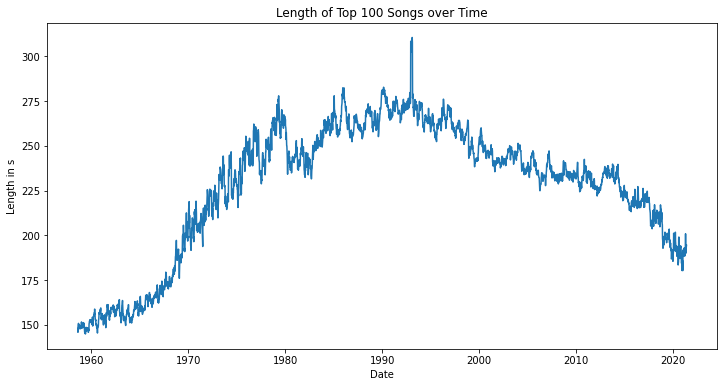

In [ ]:
plt.figure(figsize=(12,6))
plt.ylabel('Length in s')
plt.xlabel('Date')
plt.title("Length of Top 100 Songs over Time")
plt.plot(mean['spotify_track_duration_seconds']);

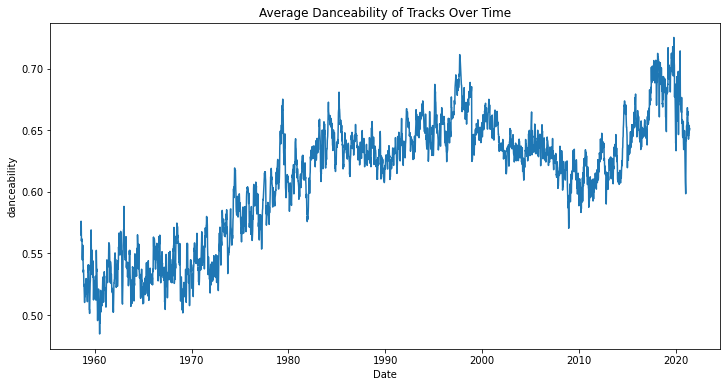

In [ ]:
plt.figure(figsize=(12,6))
plt.ylabel('danceability')
plt.xlabel('Date')
plt.title("Average Danceability of Tracks Over Time")
plt.plot(mean['danceability']);

# 3: Predict Year Based on Musicality!

## a: Multiple Linear Regression

In [ ]:
grouped_df1 = df1.groupby('SongID').agg({'WeekID':'max', 'Peak Position':'min', 'Weeks on Chart':'max' })[['WeekID', 'Peak Position','Weeks on Chart']].reset_index()
merged = df2.merge(grouped_df1)
merged['year'] = pd.DatetimeIndex(merged['WeekID']).year
len(merged)

24185

In [ ]:
merged = merged.drop(columns=['spotify_genre', 'spotify_track_explicit', 'Weeks on Chart','WeekID', 'spotify_track_popularity', 'key', 'time_signature', 'mode'])
merged = merged.set_index(keys=['SongID'])


In [ ]:
merged_top_30 = merged[merged['Peak Position'] <= 30].drop(columns=['Peak Position'])

X = merged_top_30.drop('year',axis=1).values
y = merged_top_30['year'].values
features =  merged_top_30.drop('year', axis =1).columns

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)
print('The coefficient of determination on the train data is', reg_model.score(X_train, y_train))
print('The coefficient of determination on the test data is', reg_model.score(X_test, y_test))


The coefficient of determination on the train data is 0.5558278565301835
The coefficient of determination on the test data is 0.5565346578556242


In [ ]:
reg_pred = reg_model.predict(X_test)
reg_score = reg_model.score(X_test, y_test)

### regression model is reg_model  ----- This is so when I'm calling models at the bottom, I can refer to the table of contents at the right to see the name of each model



In [ ]:
reg_feature_importance = list(zip(features, reg_model.coef_))

In [ ]:
feat_import = pd.DataFrame(reg_feature_importance, columns = ['Feature', 'Reg Coeff'])

In [ ]:
feat_import

Feature  Reg Coeff
0  spotify_track_duration_ms  52.879051
1               danceability  34.648808
2                     energy  -5.180622
3                   loudness  47.023505
4                speechiness  29.587219
5               acousticness -17.368340
6           instrumentalness  -8.431383
7                   liveness  -2.261470
8                    valence -29.585078
9                      tempo   6.402266

It's interesting, but not surprising, that both spotify_track_duration and danceability have such large coefficients. We saw very strong patterns over time among these features when exploring the data set. 

## b: Gradient Boosted Regressor

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor(random_state=0)
boost_reg.fit(X_train, y_train)
boost_predictions = boost_reg.predict(X_test)
boost_reg.score(X_test, y_test)
#reg.feature_importances_

0.6868448273876122

In [ ]:
boost_reg.feature_importances_

array([0.3515563 , 0.05697725, 0.0104078 , 0.25028634, 0.0781657 ,
       0.10112083, 0.0375469 , 0.00367275, 0.09411244, 0.01615369])

### boosted regression is boost_reg

## c: Decision Tree Regressor

In [ ]:
from sklearn import tree

In [ ]:
tree_model = tree.DecisionTreeRegressor(criterion ="mse")

In [ ]:
tree_model = tree_model.fit(X_train, y_train)

In [ ]:
tree_pred = tree_model.predict(X_test)
tree_score = tree_model.score(X_test, y_test)
print(tree_score)

0.3637503904088447


In [ ]:
feat_import['Tree Weights'] = tree_model.feature_importances_
feat_import

Feature  Reg Coeff  Tree Weights
0  spotify_track_duration_ms  52.879051      0.331017
1               danceability  34.648808      0.059309
2                     energy  -5.180622      0.047233
3                   loudness  47.023505      0.213380
4                speechiness  29.587219      0.091253
5               acousticness -17.368340      0.075295
6           instrumentalness  -8.431383      0.043755
7                   liveness  -2.261470      0.019642
8                    valence -29.585078      0.083225
9                      tempo   6.402266      0.035892

### decision tree is tree_model

## d: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators=500)
random_forest = random_forest.fit(X_train, y_train)

In [ ]:
random_forest.score(X_test,y_test)

0.706490434401979

In [ ]:
random_forest_predictions = random_forest.predict(X_test)

### random forest model is random_forest

## e: Sequential Neural Network

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=1500)

Epoch 1/1500
118/118 [==============================] - 1s 3ms/step - loss: 2394464.0000 - val_loss: 48379.2227
Epoch 2/1500
118/118 [==============================] - 0s 2ms/step - loss: 29703.8652 - val_loss: 22491.8164
Epoch 3/1500
118/118 [==============================] - 0s 2ms/step - loss: 15452.9902 - val_loss: 13510.9502
Epoch 4/1500
118/118 [==============================] - 0s 2ms/step - loss: 10866.5508 - val_loss: 10389.1982
Epoch 5/1500
118/118 [==============================] - 0s 2ms/step - loss: 8234.4434 - val_loss: 7715.6909
Epoch 6/1500
118/118 [==============================] - 0s 2ms/step - loss: 5933.1104 - val_loss: 5525.9893
Epoch 7/1500
118/118 [==============================] - 0s 2ms/step - loss: 3689.5266 - val_loss: 2919.4802
Epoch 8/1500
118/118 [==============================] - 0s 2ms/step - loss: 1946.8341 - val_loss: 1338.1628
Epoch 9/1500
118/118 [==============================] - 0s 3ms/step - loss: 895.5859 - val_loss: 569.4899
Epoch 10/1500
118/11

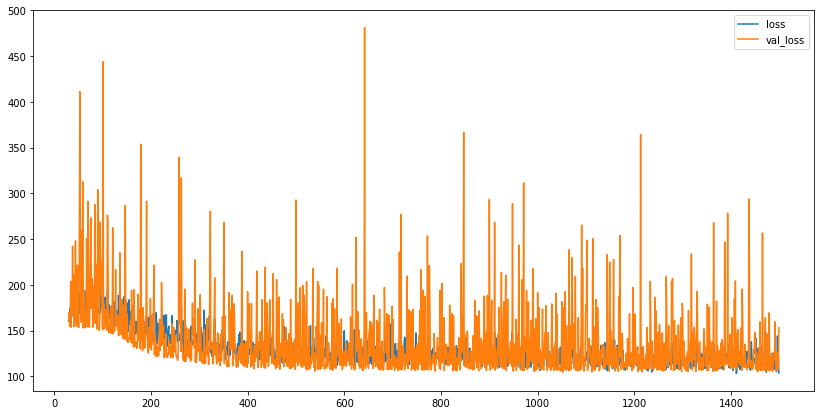

In [ ]:
losses = pd.DataFrame(model.history.history)[30:]
losses.plot(figsize=(14,7));

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
nn_pred= model.predict(X_test)
print(mean_squared_error(y_test,nn_pred))
nn_pred = nn_pred.flatten()

153.07240117961965


#4 Model Comparisons

In [ ]:
comparison = pd.DataFrame()

In [ ]:
comparison['Reg Predictions']=reg_pred
comparison['Boosted Regression Predictions']= boost_predictions
comparison['Tree Predictions']=tree_pred
comparison['RF Predictions']=random_forest_predictions
comparison['NN Predictions']=nn_pred
comparison['Actual']=y_test


In [ ]:
comparison.head()

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
0      2008.528186                     2016.545720  ...     2005.782593    2020
1      1978.545954                     1981.148249  ...     1979.057861    1991
2      1976.030635                     1986.341906  ...     1977.696411    1987
3      1989.846114                     1995.749587  ...     1992.841797    2017
4      2005.197426                     2004.582856  ...     1999.428345    2012

[5 rows x 6 columns]

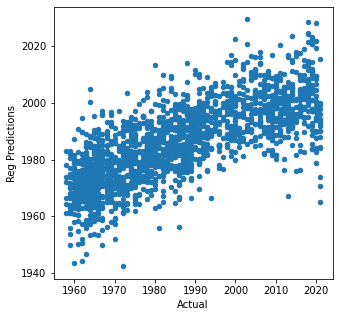

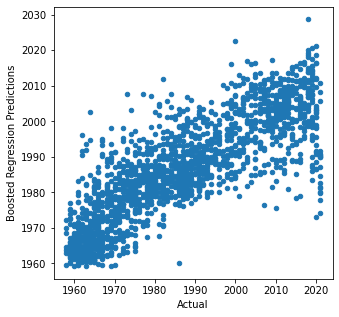

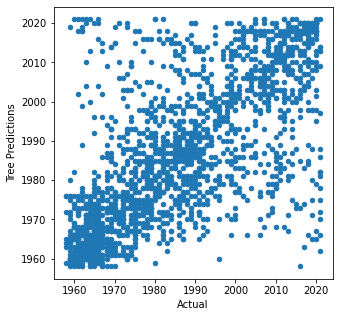

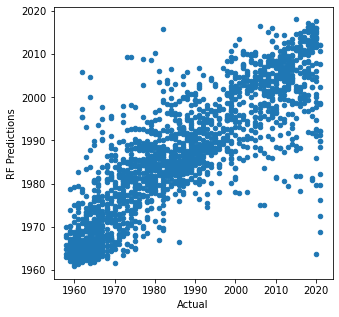

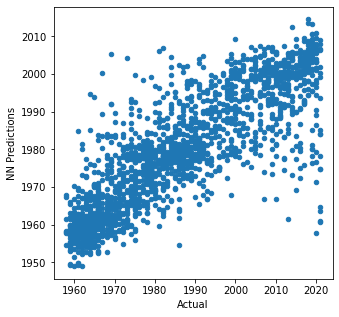

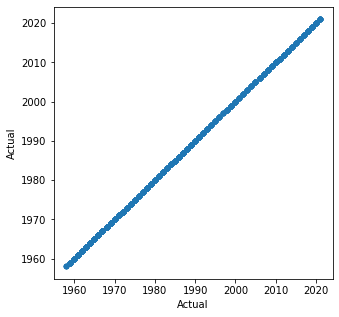

In [ ]:
for i in comparison.columns:
  comparison.plot.scatter(x='Actual', y=i, figsize=(5,5))

So, each of these should look as close as possible to the last graph, which is just y=x. We see multiple linear regression was all over the place and, perhaps not surprisingly, an ineffective tool. The decision tree regression is interesting in that it did a pretty good job but had some really funky outliers. Exploring those outliers could lead to an interesting analysis of musicality and what artists/songs were really different from their contemproraries.

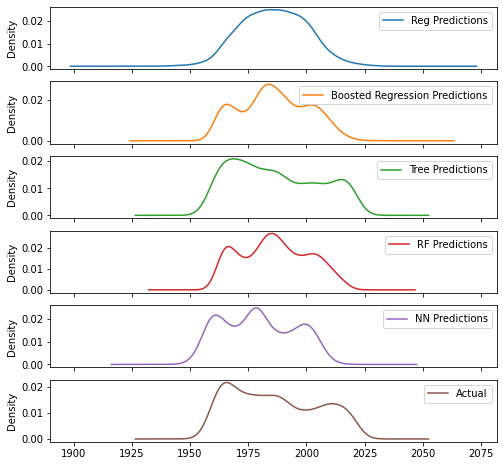

In [ ]:
comparison.plot(subplots=True, figsize=(8, 8), kind='kde'); plt.legend(loc='best');

These KDE plots have some information but we should be careful not to read too much into them. We see that the Tree is predicting roughly the right amount of music from each year but we don't know that it's predicting the right songs for those years.

In [ ]:
comparison.describe()

Reg Predictions  ...       Actual
count      1881.000000  ...  1881.000000
mean       1986.179543  ...  1986.254120
std          13.862011  ...    18.550514
min        1942.305281  ...  1958.000000
25%        1976.034910  ...  1969.000000
50%        1986.162732  ...  1984.000000
75%        1996.353117  ...  2002.000000
max        2029.483717  ...  2021.000000

[8 rows x 6 columns]

Describe isn't that helpful here. We don't care that much about the average of all the songs' ages. Rather, we want to understand what the errors look like.

In [ ]:
errors = pd.DataFrame()

for i in comparison.columns:
  errors[i] = comparison[i]-comparison['Actual']

In [ ]:
errors.describe()

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
count      1881.000000                     1881.000000  ...     1881.000000  1881.0
mean         -0.074577                       -0.144572  ...       -6.944779     0.0
std          12.353154                       10.379910  ...       10.241983     0.0
min         -56.052330                      -46.907604  ...      -62.085449     0.0
25%          -8.345500                       -5.582953  ...      -11.761597     0.0
50%           1.087176                        0.471511  ...       -6.412231     0.0
75%           8.363867                        5.964038  ...       -1.417725     0.0
max          40.785082                       38.644659  ...       36.286133     0.0

[8 rows x 6 columns]

It's really interesting that the Tree has the mean closest to 0 but also the largest standard deviation. That agrees with the scatter plots and kde plots above. The tree's kde shape was the most similar, but we saw some of the largest outliers in the scatter plot.

Also each of these models found at least one song in the test set that it thought was somewhere between 33 and 60 years in the future and a song between 54 and 62 years in the past. I suspect we can tell what song that is from the scatter plots. From the scatter plot we see each of the models has a song in the 1958-1960 range that it predicted as having originated 30+ years in the future. From the scatter plot we see each also has a song originating in 2002 or so that it thinks came from the past. Let's see if we can find these two songs.

Let's grab one of the data points that was predicted far off and see how the other models did!

In [ ]:
errors[errors['Reg Predictions']< -56]

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
598        -56.05233                      -46.884507  ...      -60.332397       0

[1 rows x 6 columns]

Looks like all of the models were pretty far off! What song was that?

In [ ]:
def lookup(song_number):
  lookup = pd.DataFrame(scaler.inverse_transform([X_test[song_number]]).flatten())
  lookup.transpose()
  original_song = merged[(merged['spotify_track_duration_ms'] == lookup['spotify_track_duration_ms'][0])]
  return(original_song)

In [ ]:
def lookup(song_number):
  lookup = pd.DataFrame(scaler.inverse_transform([X_test[song_number]]).flatten())
  lookup.transpose()
  #We needed to round some of these in the logic because after being transformed and inverse transformed they were off by very small amounts!
  #Also spotify_track_duration_ms didn't have unique values (not surprising) so we added another column to our check
  original_song = merged_top_30[(round(merged_top_30['spotify_track_duration_ms'] - lookup[0][0])==0) & (merged_top_30['danceability']-lookup[0][1]==0)]
  return(original_song)

In [ ]:
lookup(598)

spotify_track_duration_ms  ...  year
SongID                                                                         ...      
The Christmas Song (Merry Christmas To You)Nat ...                   192160.0  ...  2021
The Christmas Song (Merry Christmas To You)Nat ...                   192160.0  ...  2021

[2 rows x 11 columns]

So this is interesting. It's a christmas song from 1946 being played in 2021! No wonder most of the models are giving values earlier than 2021. It's strange that the tree gets 0, perhaps there's some overfitting going on for the tree to get it perfectly correct.

It might also make sense to come up with some sense way to elminate holiday music by removing future occurences of a song.

#5 Testing the models on songs outside top 30

Now let's predict the age of a song that didn't go into the model by calling the spotify API in this notebook and extracting the features.

In [ ]:
!pip install spotipy

In [ ]:
import spotipy
import os
import sys
import json
import time
from spotipy.oauth2 import SpotifyClientCredentials

client_id =  ###Your Spotify id!
client_secret = ###Your Spotify secret!

client_credentials_manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

I've always felt Leon Bridges has a very classic sound. Let's see if the models agree! Let's use the API to extract and transform the features then load them into our model.

In [ ]:
columns = merged_top_30.drop(columns=['year']).columns

def get_features(song_info):
  results = sp.search(q=song_info, limit=1)
  tids = []
  for i, t in enumerate(results['tracks']['items']):
    tids.append(t['uri']) 
  features = sp.audio_features(tids)
  features_df = pd.DataFrame(features).drop(columns=['key', 'type', 'id', 'uri', 'analysis_url', 'time_signature', 'mode', 'track_href'])
  #Rename the column
  features_df = features_df.rename(columns={'duration_ms':'spotify_track_duration_ms'})
  #Reorder columns
  features_df = features_df.reindex(columns, axis=1)
  return(features_df)

In [ ]:
features = get_features('river leon bridges')

In [ ]:
features

spotify_track_duration_ms  danceability  energy  ...  liveness  valence    tempo
0                     240200         0.635   0.184  ...     0.146    0.177  128.424

[1 rows x 10 columns]

In [ ]:
def lookup_song(song):
  new_df = get_features(song)
  new_df_scaled = scaler.transform(new_df.values)
  print('multiple linear regreesion:', reg_model.predict(new_df_scaled), 'boosted regreesion:', boost_reg.predict(new_df_scaled), 'tree prediction:', tree_model.predict(new_df_scaled), 'forest prediction:', random_forest.predict(new_df_scaled), 'nn prediction:', model.predict(new_df_scaled))


In [ ]:
lookup_song('leon bridges river')

multiple linear regreesion: [1992.90220023] boosted regreesion: [1992.91307762] tree prediction: [2012.] forest prediction: [2001.442] nn prediction: [[1991.8584]]


The song was actually released in 2015 so while all predictions are older than that, I don't think they're quite the confirmation I was looking for. Though admittedly, when I listen to a song and imagine it's age, I'm not considering it's duration among other factors. Maybe a more robust set of models would remove 'duration' since it may not contribute to the "sound" of the song. I'm also glad to see that the tree did well with unseen data given my overfitting concerns.

# 6 Conclusions and future work

So these models are definitely fun to play around with. I could probably spend all day looking up songs. It'd would be interesting to look at more of the outliers for each model and see how model performance varies by audio features. With that said, many of the worst cases were terrible among all the models. A

Also I didn't test the model at all on the bottom 70 songs and while many of those are eventual top 30 songs, there's a lot of music there to look at an understand through the lens of songs that do become popular.